# Electron Charge to Mass Ratio
### Author: Ayush Pandhi (1003227457)
### Date: December 02, 2018

In [170]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [171]:
#Defining the linear model function
def f(x, a, b):
    return a*x + b

In [172]:
#Loading Current vs. Diameter data
current = np.loadtxt('Current vs Diameter.txt', skiprows=2, usecols=(0,))
radius = (0.01*(np.loadtxt('Current vs Diameter.txt', skiprows=2, usecols=(1,))))/2

#Radius of coils and voltage in the system
R = 0.150
V = 181.0

#Defining errors in current, voltage and R
ierror = np.empty(len(current))
for i in range(len(current)):
    ierror[i] = max(current[i]*0.0075, 0.1/1000)
verror = 0.1
Rerror = 0.005

In [173]:
#Computing Bc (magnetic field) from current
Bc = []
for i in current:
    Bc.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(130)*(1/R)*(i))

#Propagating error for Bc
Bcerror = Bc*(((ierror/current)**2 + (Rerror/R)**2)**0.5)

In [174]:
#Linear regression
p_opt, p_cov = curve_fit(f, 1/radius, Bc, (0,0), Bcerror, True)
output = f(1/radius, p_opt[0], p_opt[1])

Chi squared for linear regression:  2.053265161196029
Estimated Be:  0.000540996453840319


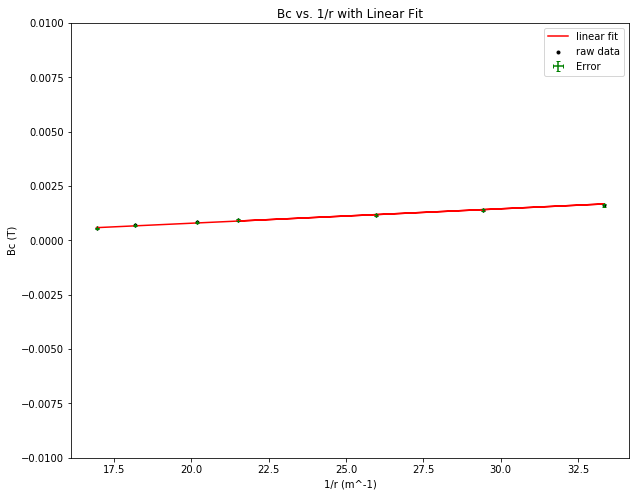

In [175]:
#Calculating chi squared
chi_sq = (1/4)*(np.sum(((Bc - output)/Bcerror)**2))
print('Chi squared for linear regression: ', chi_sq)

#Outputting estimated Be (y-intercept)
print('Estimated Be: ', -p_opt[1])

#Plot of Bc vs. 1/r
plt.figure(figsize=(10,8))
plt.scatter(1/radius, Bc, label = 'raw data', marker = '.', color = 'k')
plt.plot(1/radius, output, 'r-', label = 'linear fit')
plt.title('Bc vs. 1/r with Linear Fit')
plt.xlabel('1/r (m^-1)')
plt.ylabel('Bc (T)')
plt.errorbar(1/radius, Bc, xerr=0, yerr=Bcerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

In [176]:
#Defining k and I0
k = (((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(130)*(1/R))/(2**0.5)
I0 = (-p_opt[1])/k

#Propagating errors for k and I0
kerror = (((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(130)*(1/Rerror))/(2**0.5)
I0error = I0*(((Bcerror/Bc)**2 + (kerror/k)**2)**0.5)

#Computing the e/m ratio
emratio = -(((V**0.5)/(radius*k))*(1/(current - I0)))**2
print('Mean charge to mass ratio: ', np.mean(emratio))

Mean charge to mass ratio:  -9374200927793.904
